# Import library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler

pd.options.display.max_columns = 120
pd.options.display.max_rows = 3000

# Loading data

In [2]:
df = pd.read_csv('../project_2/df_train_sub8.csv')

In [3]:
df.head(2)

,id,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,utilities,lot_config,land_slope,neighborhood,condition_1,condition_2,bldg_type,house_style,overall_qual,overall_cond,year_built,year_remod/add,roof_style,roof_matl,exterior_1st,exterior_2nd,mas_vnr_type,mas_vnr_area,exter_qual,exter_cond,foundation,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_sf_1,bsmtfin_type_2,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,heating,heating_qc,central_air,electrical,1st_flr_sf,2nd_flr_sf,low_qual_fin_sf,gr_liv_area,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,kitchen_qual,totrms_abvgrd,functional,fireplaces,fireplace_qu,garage_type,garage_yr_blt,garage_finish,garage_cars,garage_area,garage_qual,garage_cond,paved_drive,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,pool_qc,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type,saleprice,neighborhood_Blueste,neighborhood_BrDale,neighborhood_BrkSide,neighborhood_ClearCr,neighborhood_CollgCr,neighborhood_Crawfor,neighborhood_Edwards,neighborhood_Gilbert,neighborhood_Greens,neighborhood_GrnHill,neighborhood_IDOTRR,neighborhood_Landmrk,neighborhood_MeadowV,neighborhood_Mitchel,neighborhood_NAmes,neighborhood_NPkVill,neighborhood_NWAmes,neighborhood_NoRidge,neighborhood_NridgHt,neighborhood_OldTown,neighborhood_SWISU,neighborhood_Sawyer,neighborhood_SawyerW,neighborhood_Somerst,neighborhood_StoneBr,neighborhood_Timber,neighborhood_Veenker,fbxgrla,frxgrla
0,109,533352170,60,RL,0.0,13517,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,Sawyer,RRAe,Norm,1Fam,2Story,6,8,1976,2005,Gable,CompShg,HdBoard,Plywood,BrkFace,289.0,Gd,TA,CBlock,TA,TA,No,GLQ,533.0,Unf,0.0,192.0,725.0,GasA,Ex,Y,SBrkr,725,754,0,1479,0.0,0.0,2,1,3,1,Gd,6,Typ,0,NaN,Attchd,1976.0,RFn,2.0,475.0,TA,TA,Y,0,44,0,0,0,0,NaN,NaN,NaN,0,3,2010,WD,130500,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,2958,0
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,SawyerW,Norm,Norm,1Fam,2Story,7,5,1996,1997,Gable,CompShg,VinylSd,VinylSd,BrkFace,132.0,Gd,TA,PConc,Gd,TA,No,GLQ,637.0,Unf,0.0,276.0,913.0,GasA,Ex,Y,SBrkr,913,1209,0,2122,1.0,0.0,2,1,4,1,Gd,8,Typ,1,TA,Attchd,1997.0,RFn,2.0,559.0,TA,TA,Y,0,74,0,0,0,0,NaN,NaN,NaN,0,4,2009,WD,220000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,4244,2122


In [4]:
df.shape

(2050, 110)

# Handle null values

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2050 entries, 0 to 2049
Columns: 110 entries, id to frxgrla
dtypes: float64(11), int64(57), object(42)
memory usage: 1.7+ MB


In [6]:
df.columns

Index(['id', 'pid', 'ms_subclass', 'ms_zoning', 'lot_frontage', 'lot_area',
       'street', 'alley', 'lot_shape', 'land_contour',
       ...
       'neighborhood_OldTown', 'neighborhood_SWISU', 'neighborhood_Sawyer',
       'neighborhood_SawyerW', 'neighborhood_Somerst', 'neighborhood_StoneBr',
       'neighborhood_Timber', 'neighborhood_Veenker', 'fbxgrla', 'frxgrla'],
      dtype='object', length=110)

In [7]:
df.describe()

,id,pid,ms_subclass,lot_frontage,lot_area,overall_qual,overall_cond,year_built,year_remod/add,mas_vnr_area,bsmtfin_sf_1,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,1st_flr_sf,2nd_flr_sf,low_qual_fin_sf,gr_liv_area,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,totrms_abvgrd,fireplaces,garage_yr_blt,garage_cars,garage_area,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,misc_val,mo_sold,yr_sold,saleprice,neighborhood_Blueste,neighborhood_BrDale,neighborhood_BrkSide,neighborhood_ClearCr,neighborhood_CollgCr,neighborhood_Crawfor,neighborhood_Edwards,neighborhood_Gilbert,neighborhood_Greens,neighborhood_GrnHill,neighborhood_IDOTRR,neighborhood_Landmrk,neighborhood_MeadowV,neighborhood_Mitchel,neighborhood_NAmes,neighborhood_NPkVill,neighborhood_NWAmes,neighborhood_NoRidge,neighborhood_NridgHt,neighborhood_OldTown,neighborhood_SWISU,neighborhood_Sawyer,neighborhood_SawyerW,neighborhood_Somerst,neighborhood_StoneBr,neighborhood_Timber,neighborhood_Veenker,fbxgrla,frxgrla
count,2050.000000,2.050000e+03,2050.000000,2050.000000,2050.000000,2050.000000,2050.000000,2050.000000,2050.000000,2050.000000,2050.000000,2050.000000,2050.000000,2050.000000,2050.000000,2050.000000,2050.000000,2050.000000,2050.000000,2049.000000,2050.000000,2050.000000,2050.000000,2050.000000,2050.000000,2050.000000,2050.000000,2049.000000,2050.000000,2050.000000,2050.000000,2050.000000,2050.000000,2050.000000,2050.000000,2050.000000,2050.000000,2050.000000,2050.000000,2050.000000,2050.000000,2050.000000,2050.000000,2050.000000,2050.000000,2050.000000,2050.000000,2050.000000,2050.000000,2050.000000,2050.000000,2050.000000,2050.000000,2050.00000,2050.000000,2050.000000,2050.000000,2050.000000,2050.000000,2050.00000,2050.000000,2050.000000,2050.000000,2050.000000,2050.000000,2050.000000,2050.000000,2050.000000
mean,1474.098049,7.134975e+08,57.026829,57.924390,10067.220488,6.113171,5.561463,1971.721463,1984.206829,98.674634,442.300488,47.959024,567.728293,1057.987805,1164.619024,329.489756,5.515610,1499.624390,0.427317,0.063446,1.577561,0.371220,2.843902,1.042927,6.437073,0.591220,1868.688293,1.776964,473.535122,93.879512,47.580000,22.582927,2.592683,16.519512,2.399024,51.599512,6.220976,2007.775610,181519.686829,0.002927,0.009268,0.036585,0.013171,0.087805,0.034634,0.069756,0.056585,0.001463,0.000976,0.033659,0.000488,0.011707,0.040000,0.15122,0.008293,0.042439,0.023415,0.059512,0.079512,0.01561,0.054146,0.042439,0.063415,0.018537,0.023415,0.008293,2535.272195,1033.008293
std,844.181724,1.886914e+08,42.826865,33.132999,6743.517958,1.425855,1.104310,30.179906,21.027815,174.353604,461.204124,165.000901,444.954786,449.410704,396.499270,425.712712,51.081185,500.392368,0.522631,0.251705,0.549265,0.501098,0.826610,0.209839,1.559677,0.638539,454.241249,0.764531,216.145575,128.564062,66.755256,59.857633,25.235706,57.387043,37.791752,573.532756,2.744967,1.312325,79245.655820,0.054034,0.095848,0.187787,0.114033,0.283080,0.182896,0.254798,0.231105,0.038236,0.031227,0.180393,0.022086,0.107591,0.196007,0.35835,0.090708,0.201638,0.151253,0.236639,0.270603,0.12399,0.226361,0.201638,0.243767,0.134914,0.151253,0.090708,1556.338007,1300.991420
min,1.000000,5.263011e+08,20.000000,0.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,12789.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,753.250000,5.284581e+08,20.000000,43.250000,7500.000000,5.000000,5.000000,1954.000000,1965.000000,0.000000,0.000000,0.000000,220.000000,793.000000,879.250000,0.

df['fbxgrla'] = df['full_bath'] * df['gr_liv_area']

df['frxgrla'] = df['fireplaces'] * df['gr_liv_area']

df.shape

# Clean-up and EDA

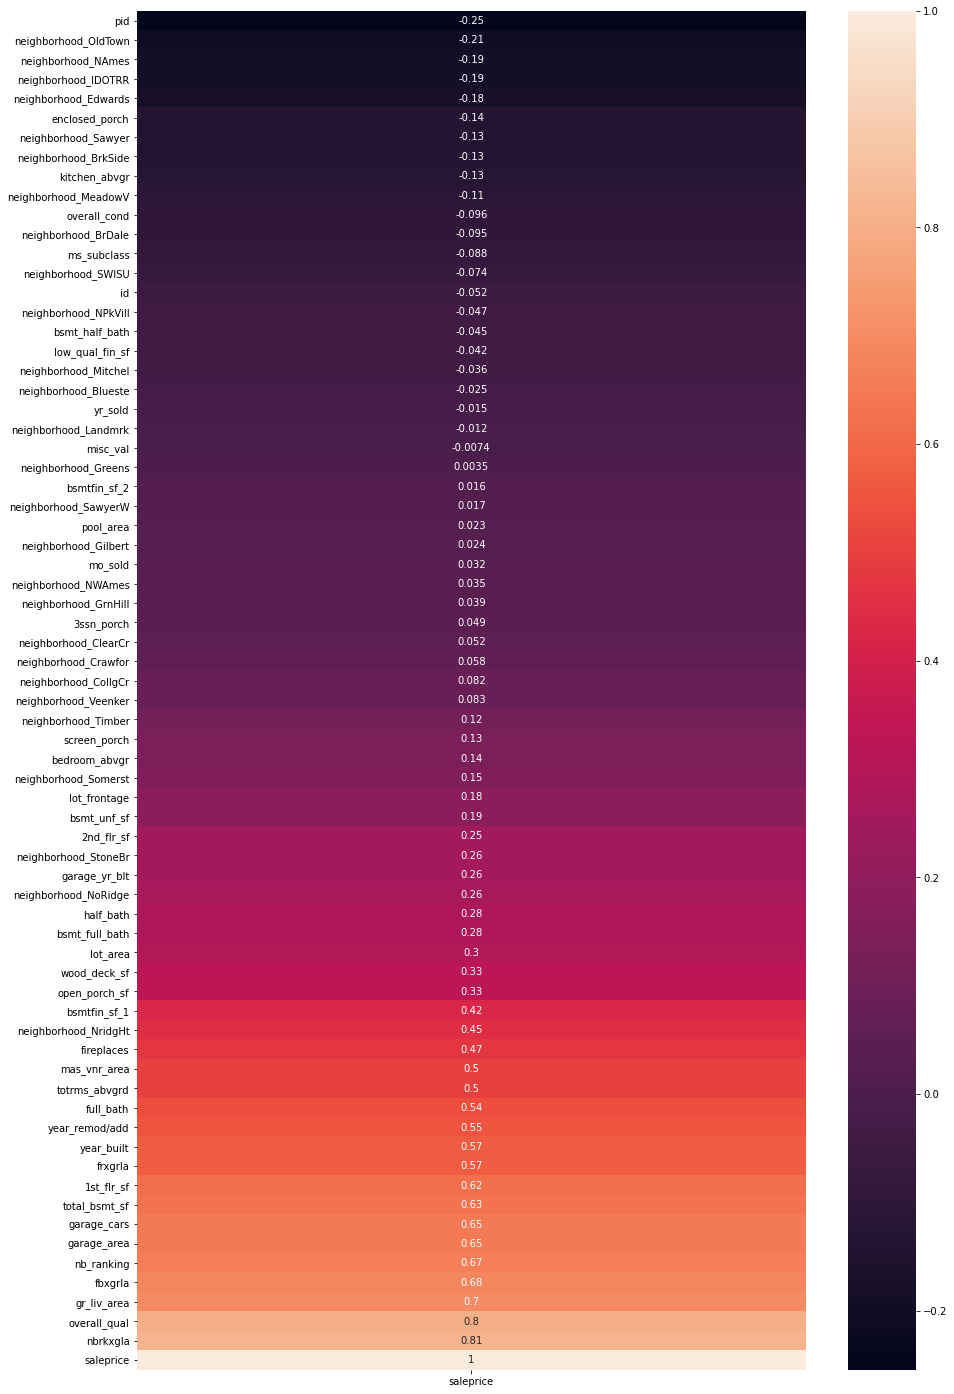

In [89]:
# sns.heatmap(df.corr()[['bpm']].sort_values('bpm'), annot = True)
plt.figure(figsize = (15, 25))

sns.heatmap(df.corr()[['saleprice']].sort_values('saleprice'), annot = True);

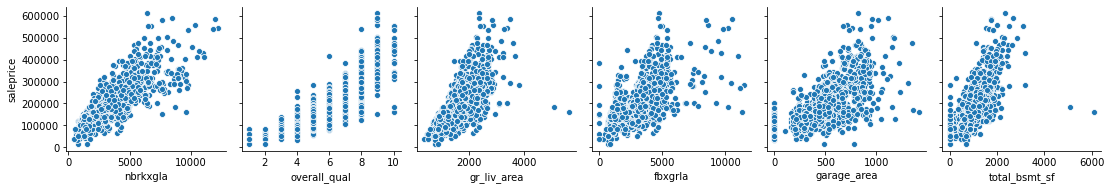

In [91]:
sns.pairplot(df, y_vars=['saleprice'], x_vars=['nbrkxgla', 'overall_qual', 'gr_liv_area', 'fbxgrla', 
                                               'garage_area', 'total_bsmt_sf',])

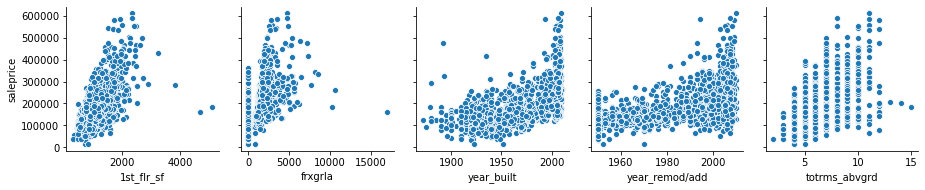

In [13]:
sns.pairplot(df, y_vars=['saleprice'], x_vars=['1st_flr_sf', 'frxgrla', 'year_built', 
                                               'year_remod/add', 'totrms_abvgrd',])

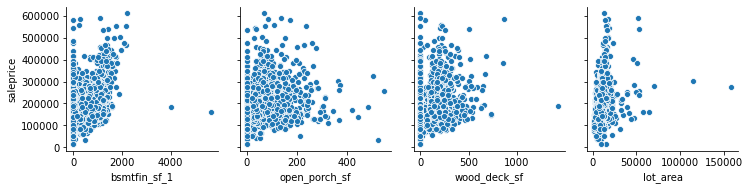

In [14]:
sns.pairplot(df, y_vars=['saleprice'], x_vars=['bsmtfin_sf_1', 'open_porch_sf', 'wood_deck_sf', 'lot_area',])

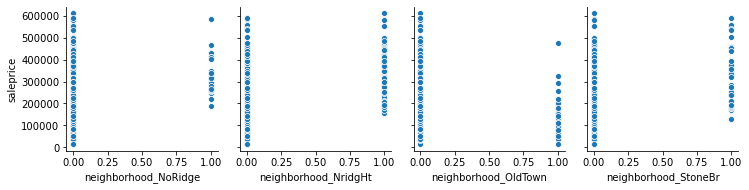

In [15]:
sns.pairplot(df, y_vars=['saleprice'], x_vars=['neighborhood_NoRidge', 'neighborhood_NridgHt', 
                                               'neighborhood_OldTown','neighborhood_StoneBr'])

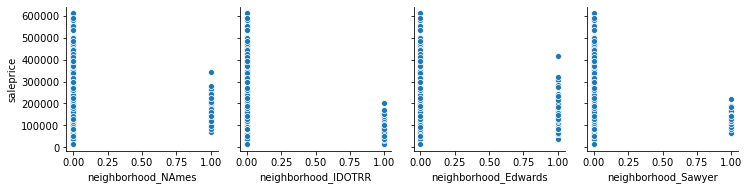

In [16]:
sns.pairplot(df, y_vars=['saleprice'], x_vars=['neighborhood_NAmes', 'neighborhood_IDOTRR', 
                                               'neighborhood_Edwards', 'neighborhood_Sawyer'])

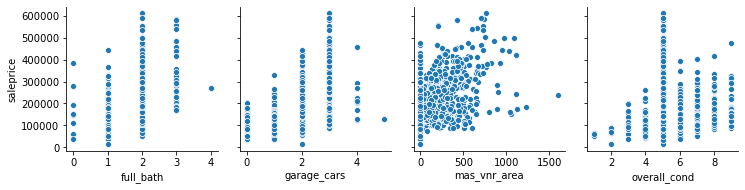

In [85]:
sns.pairplot(df, y_vars=['saleprice'], x_vars=['full_bath', 'garage_cars', 'mas_vnr_area', 'overall_cond'])

In [71]:
nb_dum_list = ['neighborhood_Blueste', 'neighborhood_BrDale', 'neighborhood_BrkSide', 'neighborhood_ClearCr',
               'neighborhood_CollgCr', 'neighborhood_Crawfor', 'neighborhood_Edwards', 'neighborhood_Gilbert',
               'neighborhood_Greens', 'neighborhood_GrnHill', 'neighborhood_IDOTRR', 'neighborhood_Landmrk',
               'neighborhood_MeadowV', 'neighborhood_Mitchel', 'neighborhood_NAmes', 'neighborhood_NPkVill', 
               'neighborhood_NWAmes', 'neighborhood_NoRidge', 'neighborhood_NridgHt', 'neighborhood_OldTown',
               'neighborhood_SWISU', 'neighborhood_Sawyer', 'neighborhood_SawyerW', 'neighborhood_Somerst',
               'neighborhood_StoneBr', 'neighborhood_Timber','neighborhood_Veenker']

In [74]:
nb_name = []
for nb in nb_dum_list:
    nb.split('_')[1]
    nb_name.append(nb.split('_')[1])

nb_name

['Blueste',
 'BrDale',
 'BrkSide',
 'ClearCr',
 'CollgCr',
 'Crawfor',
 'Edwards',
 'Gilbert',
 'Greens',
 'GrnHill',
 'IDOTRR',
 'Landmrk',
 'MeadowV',
 'Mitchel',
 'NAmes',
 'NPkVill',
 'NWAmes',
 'NoRidge',
 'NridgHt',
 'OldTown',
 'SWISU',
 'Sawyer',
 'SawyerW',
 'Somerst',
 'StoneBr',
 'Timber',
 'Veenker']

In [100]:
df['nb_ranking'] = df['neighborhood'].map({'Blueste':1.6, 'BrDale':1, 'BrkSide': 1.35, 'ClearCr': 2.35,
                                          'CollgCr':2.5, 'Crawfor':2.5, 'Edwards': 1.7, 'Gilbert': 2.1,
                                           'Greens': 1.95, 'GrnHill':3, 'IDOTRR':1.05, 'Landmrk':1.5,
                                           'MeadowV':1.25, 'Mitchel':1.45, 'NAmes':1.9, 'NPkVill':1.35,
                                           'NWAmes':2.05, 'NoRidge':3.4, 'NridgHt':2.7, 'OldTown':1.85,
                                           'SWISU':1.45, 'Sawyer':1.4, 'SawyerW':2, 'Somerst':2.15,
                                           'StoneBr':3.6, 'Timber':2.85, 'Veenker':2.6, 'Blmngtn':2.1})

In [101]:
df['nb_ranking'].sort_values().value_counts()

1.90    310
2.50    251
1.85    163
1.70    143
2.10    138
2.15    130
2.70    122
1.45    114
1.40    111
1.35     92
2.05     87
2.00     87
1.05     69
2.85     48
3.40     48
3.60     38
2.35     27
1.25     24
1.00     19
2.60     17
1.60      6
1.95      3
3.00      2
1.50      1
Name: nb_ranking, dtype: int64

In [103]:
df['nbrkxgla'] = df['nb_ranking'] * df['gr_liv_area']

In [104]:
df['nbrkxgla'].isnull().sum()

0

In [105]:
df[df['nbrkxgla'].isnull()]

,id,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,utilities,lot_config,land_slope,neighborhood,condition_1,condition_2,bldg_type,house_style,overall_qual,overall_cond,year_built,year_remod/add,roof_style,roof_matl,exterior_1st,exterior_2nd,mas_vnr_type,mas_vnr_area,exter_qual,exter_cond,foundation,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_sf_1,bsmtfin_type_2,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,heating,heating_qc,central_air,electrical,1st_flr_sf,2nd_flr_sf,low_qual_fin_sf,gr_liv_area,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,kitchen_qual,totrms_abvgrd,functional,fireplaces,fireplace_qu,garage_type,garage_yr_blt,garage_finish,garage_cars,garage_area,garage_qual,garage_cond,paved_drive,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,pool_qc,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type,saleprice,neighborhood_Blueste,neighborhood_BrDale,neighborhood_BrkSide,neighborhood_ClearCr,neighborhood_CollgCr,neighborhood_Crawfor,neighborhood_Edwards,neighborhood_Gilbert,neighborhood_Greens,neighborhood_GrnHill,neighborhood_IDOTRR,neighborhood_Landmrk,neighborhood_MeadowV,neighborhood_Mitchel,neighborhood_NAmes,neighborhood_NPkVill,neighborhood_NWAmes,neighborhood_NoRidge,neighborhood_NridgHt,neighborhood_OldTown,neighborhood_SWISU,neighborhood_Sawyer,neighborhood_SawyerW,neighborhood_Somerst,neighborhood_StoneBr,neighborhood_Timber,neighborhood_Veenker,fbxgrla,frxgrla,nb_ranking,nbrkxgla


In [106]:
df.shape

(2050, 112)

In [107]:
df.head(3)

,id,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,utilities,lot_config,land_slope,neighborhood,condition_1,condition_2,bldg_type,house_style,overall_qual,overall_cond,year_built,year_remod/add,roof_style,roof_matl,exterior_1st,exterior_2nd,mas_vnr_type,mas_vnr_area,exter_qual,exter_cond,foundation,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_sf_1,bsmtfin_type_2,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,heating,heating_qc,central_air,electrical,1st_flr_sf,2nd_flr_sf,low_qual_fin_sf,gr_liv_area,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,kitchen_qual,totrms_abvgrd,functional,fireplaces,fireplace_qu,garage_type,garage_yr_blt,garage_finish,garage_cars,garage_area,garage_qual,garage_cond,paved_drive,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,pool_qc,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type,saleprice,neighborhood_Blueste,neighborhood_BrDale,neighborhood_BrkSide,neighborhood_ClearCr,neighborhood_CollgCr,neighborhood_Crawfor,neighborhood_Edwards,neighborhood_Gilbert,neighborhood_Greens,neighborhood_GrnHill,neighborhood_IDOTRR,neighborhood_Landmrk,neighborhood_MeadowV,neighborhood_Mitchel,neighborhood_NAmes,neighborhood_NPkVill,neighborhood_NWAmes,neighborhood_NoRidge,neighborhood_NridgHt,neighborhood_OldTown,neighborhood_SWISU,neighborhood_Sawyer,neighborhood_SawyerW,neighborhood_Somerst,neighborhood_StoneBr,neighborhood_Timber,neighborhood_Veenker,fbxgrla,frxgrla,nb_ranking,nbrkxgla
0,109,533352170,60,RL,0.0,13517,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,Sawyer,RRAe,Norm,1Fam,2Story,6,8,1976,2005,Gable,CompShg,HdBoard,Plywood,BrkFace,289.0,Gd,TA,CBlock,TA,TA,No,GLQ,533.0,Unf,0.0,192.0,725.0,GasA,Ex,Y,SBrkr,725,754,0,1479,0.0,0.0,2,1,3,1,Gd,6,Typ,0,NaN,Attchd,1976.0,RFn,2.0,475.0,TA,TA,Y,0,44,0,0,0,0,NaN,NaN,NaN,0,3,2010,WD,130500,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,2958,0,1.4,2070.6
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,SawyerW,Norm,Norm,1Fam,2Story,7,5,1996,1997,Gable,CompShg,VinylSd,VinylSd,BrkFace,132.0,Gd,TA,PConc,Gd,TA,No,GLQ,637.0,Unf,0.0,276.0,913.0,GasA,Ex,Y,SBrkr,913,1209,0,2122,1.0,0.0,2,1,4,1,Gd,8,Typ,1,TA,Attchd,1997.0,RFn,2.0,559.0,TA,TA,Y,0,74,0,0,0,0,NaN,NaN,NaN,0,4,2009,WD,220000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,4244,2122,2.0,4244.0
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,7,1953,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,Gd,CBlock,TA,TA,No,GLQ,731.0,Unf,0.0,326.0,1057.0,GasA,TA,Y,SBrkr,1057,0,0,1057,1.0,0.0,1,0,3,1,Gd,5,Typ,0,NaN,Detchd,1953.0,Unf,1.0,246.0,TA,TA,Y,0,52,0,0,0,0,NaN,NaN,NaN,0,1,2010,WD,109000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1057,0,1.9,2008.3


<font size=3 color= green><b>The following three lines of code are for neighborhood reviewing.</b></font>

sns.pairplot(df, y_vars=['saleprice'], x_vars=['neighborhood_BrkSide'])

sns.pairplot(df, y_vars=['saleprice'], x_vars=['neighborhood_Timber',
 'neighborhood_Veenker'])

In [174]:
df['garage_finish'].describe()

count     1936
unique       3
top        Unf
freq       848
Name: garage_finish, dtype: object

In [188]:
df['garage_cars'].value_counts()

2.0    1136
1.0     523
3.0     263
0.0     114
4.0      13
5.0       1
Name: garage_cars, dtype: int64

In [186]:
df[df['garage_cars'].isnull()]

,id,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,utilities,lot_config,land_slope,neighborhood,condition_1,condition_2,bldg_type,house_style,overall_qual,overall_cond,year_built,year_remod/add,roof_style,roof_matl,exterior_1st,exterior_2nd,mas_vnr_type,mas_vnr_area,exter_qual,exter_cond,foundation,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_sf_1,bsmtfin_type_2,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,heating,heating_qc,central_air,electrical,1st_flr_sf,2nd_flr_sf,low_qual_fin_sf,gr_liv_area,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,kitchen_qual,totrms_abvgrd,functional,fireplaces,fireplace_qu,garage_type,garage_yr_blt,garage_finish,garage_cars,garage_area,garage_qual,garage_cond,paved_drive,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,pool_qc,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type,saleprice,neighborhood_Blueste,neighborhood_BrDale,neighborhood_BrkSide,neighborhood_ClearCr,neighborhood_CollgCr,neighborhood_Crawfor,neighborhood_Edwards,neighborhood_Gilbert,neighborhood_Greens,neighborhood_GrnHill,neighborhood_IDOTRR,neighborhood_Landmrk,neighborhood_MeadowV,neighborhood_Mitchel,neighborhood_NAmes,neighborhood_NPkVill,neighborhood_NWAmes,neighborhood_NoRidge,neighborhood_NridgHt,neighborhood_OldTown,neighborhood_SWISU,neighborhood_Sawyer,neighborhood_SawyerW,neighborhood_Somerst,neighborhood_StoneBr,neighborhood_Timber,neighborhood_Veenker,fbxgrla,frxgrla,nb_ranking,nbrkxgla


In [185]:
df['garage_cars'] = df['garage_cars'].replace(np.nan, 0)

<font size=3 color= green><b>The following three lines of code are for single column reviewing.</b></font>

- Should I drop df['garage_yr_blt'] == 0?
- drop df['mas_vnr_area'].isnull()? x22

df['bsmt_full_bath'] = df['bsmt_full_bath'].fillna(0)

df['bsmt_full_bath'].isnull().sum()

df['bsmt_full_bath'].describe()

df['full_bath'].value_counts()

In [108]:
df.to_csv('df_train_sub9.csv', index = False)

# Define Feature Matrix & Target

In [189]:
features = ['nbrkxgla','overall_qual', 'nb_ranking', 'gr_liv_area', 'fbxgrla', 'garage_area', 'total_bsmt_sf',
            '1st_flr_sf', 'frxgrla', 'year_built', 'year_remod/add', 'totrms_abvgrd', 'garage_cars']

In [190]:
df[features].isnull().sum()

nbrkxgla          0
overall_qual      0
nb_ranking        0
gr_liv_area       0
fbxgrla           0
garage_area       0
total_bsmt_sf     0
1st_flr_sf        0
frxgrla           0
year_built        0
year_remod/add    0
totrms_abvgrd     0
garage_cars       0
dtype: int64

In [192]:
y = df['saleprice']
X = df[features]

#### Train-Test-Split

In [193]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, random_state = 308)

## Standardscaler transform

ss = StandardScaler()

ss.fit(X_train)

X_train_sc = ss.transform(X_train)

X_valid_sc = ss.transform(X_valid)

#### Instantiate, Fit, Score Model

In [194]:
lr = LinearRegression()

In [195]:
lr.fit(X_train, y_train)

LinearRegression()

In [196]:
cross_val_score(lr, X_train, y_train)

array([0.83908175, 0.84634925, 0.86430824, 0.88080689, 0.78321781])

In [222]:
cross_val_score(lr, X_train, y_train).mean()

0.8427527890099

In [198]:
cross_val_score(lr, X_valid, y_valid)

array([0.80055272, 0.47077021, 0.76419529, 0.87844212, 0.88737959])

In [199]:
cross_val_score(lr, X_valid, y_valid).mean()

0.760267985912913

In [200]:
lr.score(X_train, y_train), lr.score(X_valid, y_valid)

(0.850406897788141, 0.8109094264189276)

In [172]:
list(zip(X.columns, lr.coef_))

[('nbrkxgla', 41.76643093455142),
 ('overall_qual', 15319.607925732333),
 ('nb_ranking', -47467.2041540817),
 ('gr_liv_area', -56.91001225159985),
 ('fbxgrla', -0.0565556846864193),
 ('garage_area', 44.81808995846178),
 ('total_bsmt_sf', 21.02633622116124),
 ('1st_flr_sf', 16.468916287363424),
 ('frxgrla', 6.581843815523976),
 ('year_built', 169.14221903580898),
 ('year_remod/add', 401.04594942968004),
 ('totrms_abvgrd', 151.39878267123265)]

#### Now we have a model object, and we can run our df_test data through it

# Prep df_test data

In [202]:
df_test = pd.read_csv('../project_2/df_test_sub8.csv')

In [203]:
df_test.shape

(878, 110)

In [204]:
df_test.describe()

,id,pid,ms_subclass,lot_frontage,lot_area,overall_qual,overall_cond,year_built,year_remod/add,mas_vnr_area,bsmtfin_sf_1,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,1st_flr_sf,2nd_flr_sf,low_qual_fin_sf,gr_liv_area,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,totrms_abvgrd,fireplaces,garage_yr_blt,garage_cars,garage_area,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,misc_val,mo_sold,yr_sold,neighborhood_Blueste,neighborhood_BrDale,neighborhood_BrkSide,neighborhood_ClearCr,neighborhood_CollgCr,neighborhood_Crawfor,neighborhood_Edwards,neighborhood_Gilbert,neighborhood_Greens,neighborhood_IDOTRR,neighborhood_MeadowV,neighborhood_Mitchel,neighborhood_NAmes,neighborhood_NPkVill,neighborhood_NWAmes,neighborhood_NoRidge,neighborhood_NridgHt,neighborhood_OldTown,neighborhood_SWISU,neighborhood_Sawyer,neighborhood_SawyerW,neighborhood_Somerst,neighborhood_StoneBr,neighborhood_Timber,neighborhood_Veenker,neighborhood_GrnHill,neighborhood_Landmrk,y_hat,fbxgrla,frxgrla
count,878.000000,8.780000e+02,878.000000,718.000000,878.000000,878.000000,878.000000,878.000000,878.000000,877.000000,878.000000,878.000000,878.000000,878.000000,878.000000,878.000000,878.000000,878.000000,878.000000,878.000000,878.000000,878.000000,878.000000,878.000000,878.000000,878.000000,833.000000,878.000000,878.000000,878.000000,878.000000,878.000000,878.000000,878.000000,878.000000,878.000000,878.000000,878.000000,878.000000,878.000000,878.000000,878.000000,878.000000,878.000000,878.000000,878.000000,878.000000,878.000000,878.000000,878.000000,878.000000,878.000000,878.000000,878.000000,878.000000,878.00000,878.000000,878.000000,878.000000,878.000000,878.000000,878.000000,878.000000,878.0,878.0,878.000000,878.000000,878.000000
mean,1444.749431,7.162867e+08,58.268793,69.545961,10307.033030,6.050114,5.566059,1970.492027,1984.417995,106.236032,441.328018,53.896355,539.133257,1034.357631,1145.787016,348.398633,2.728929,1496.914579,0.439636,0.055809,1.539863,0.398633,2.879271,1.047836,6.454442,0.618451,1976.759904,1.742597,470.362187,93.430524,47.070615,24.064920,2.597950,14.830296,1.884966,48.498861,6.202733,2007.825740,0.004556,0.012528,0.036446,0.019362,0.099089,0.036446,0.056948,0.055809,0.005695,0.027335,0.014806,0.036446,0.151481,0.006834,0.050114,0.026196,0.050114,0.08656,0.018223,0.045558,0.043280,0.059226,0.014806,0.027335,0.007973,0.0,0.0,179421.778172,2491.335991,1079.200456
std,850.838263,1.889103e+08,42.235407,23.533945,10002.674602,1.369065,1.128903,30.395895,20.450725,187.158908,438.457329,178.632355,426.172161,413.446291,375.264111,432.985566,32.572548,506.468967,0.529948,0.229683,0.559060,0.505927,0.830712,0.223966,1.596632,0.669571,25.689763,0.750391,212.734075,121.181702,68.180939,73.249463,24.962482,53.003794,29.916672,550.169317,2.642498,1.327861,0.067381,0.111291,0.187505,0.137873,0.298952,0.187505,0.231875,0.229683,0.075291,0.163150,0.120846,0.187505,0.358721,0.082430,0.218304,0.159809,0.218304,0.28135,0.133834,0.208644,0.203603,0.236181,0.120846,0.163150,0.088984,0.0,0.0,70486.712759,1637.616102,1326.089783
min,2.000000,5.263021e+08,20.000000,21.000000,1477.000000,2.000000,1.000000,1880.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,407.000000,0.000000,0.000000,407.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,7207.479659,0.000000,0.000000
25%,692.250000,5.284841e+08,20.000000,59.000000,7297.250000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,216.000000,789.000000,864.000000,0.000000,0.000000,1114.000000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,196

In [205]:
df_test['nb_ranking'] = df_test['neighborhood'].map({'Blueste':1.6, 'BrDale':1, 'BrkSide': 1.35, 'ClearCr': 2.35,
                                          'CollgCr':2.5, 'Crawfor':2.5, 'Edwards': 1.7, 'Gilbert': 2.1,
                                           'Greens': 1.95, 'GrnHill':3, 'IDOTRR':1.05, 'Landmrk':1.5,
                                           'MeadowV':1.25, 'Mitchel':1.45, 'NAmes':1.9, 'NPkVill':1.35,
                                           'NWAmes':2.05, 'NoRidge':3.4, 'NridgHt':2.7, 'OldTown':1.85,
                                           'SWISU':1.45, 'Sawyer':1.4, 'SawyerW':2, 'Somerst':2.15,
                                           'StoneBr':3.6, 'Timber':2.85, 'Veenker':2.6, 'Blmngtn':2.1})

In [206]:
df_test['nb_ranking'].sort_values().value_counts()

1.90    133
2.50    119
1.85     76
2.10     55
2.15     52
1.70     50
1.45     48
2.70     44
2.05     44
1.40     40
1.35     38
2.00     38
1.05     24
2.85     24
3.40     23
2.35     17
1.25     13
3.60     13
1.00     11
2.60      7
1.95      5
1.60      4
Name: nb_ranking, dtype: int64

In [207]:
df_test['nbrkxgla'] = df_test['nb_ranking'] * df_test['gr_liv_area']

df_test['fbxgrla'] = df_test['full_bath'] * df_test['gr_liv_area']

df_test['frxgrla'] = df_test['fireplaces'] * df_test['gr_liv_area']

In [208]:
df_test.to_csv('df_test_sub9.csv', index = False)

In [209]:
df_test.shape

(878, 112)

#### Make sure there aren't any nulls in the columns we used in the model:

In [210]:
df_test[features].isnull().sum()

nbrkxgla          0
overall_qual      0
nb_ranking        0
gr_liv_area       0
fbxgrla           0
garage_area       0
total_bsmt_sf     0
1st_flr_sf        0
frxgrla           0
year_built        0
year_remod/add    0
totrms_abvgrd     0
garage_cars       0
dtype: int64

In [ ]:
list(df_test.columns)

In [211]:
X_TEST = df_test[features]

X_TEST_SC = ss.transform(X_TEST)

#### Create Predictions

In [212]:
df_test['y_hat'] = lr.predict(X_TEST)

In [213]:
df_test.head()

,id,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,utilities,lot_config,land_slope,neighborhood,condition_1,condition_2,bldg_type,house_style,overall_qual,overall_cond,year_built,year_remod/add,roof_style,roof_matl,exterior_1st,exterior_2nd,mas_vnr_type,mas_vnr_area,exter_qual,exter_cond,foundation,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_sf_1,bsmtfin_type_2,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,heating,heating_qc,central_air,electrical,1st_flr_sf,2nd_flr_sf,low_qual_fin_sf,gr_liv_area,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,kitchen_qual,totrms_abvgrd,functional,fireplaces,fireplace_qu,garage_type,garage_yr_blt,garage_finish,garage_cars,garage_area,garage_qual,garage_cond,paved_drive,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,pool_qc,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type,neighborhood_Blueste,neighborhood_BrDale,neighborhood_BrkSide,neighborhood_ClearCr,neighborhood_CollgCr,neighborhood_Crawfor,neighborhood_Edwards,neighborhood_Gilbert,neighborhood_Greens,neighborhood_IDOTRR,neighborhood_MeadowV,neighborhood_Mitchel,neighborhood_NAmes,neighborhood_NPkVill,neighborhood_NWAmes,neighborhood_NoRidge,neighborhood_NridgHt,neighborhood_OldTown,neighborhood_SWISU,neighborhood_Sawyer,neighborhood_SawyerW,neighborhood_Somerst,neighborhood_StoneBr,neighborhood_Timber,neighborhood_Veenker,neighborhood_GrnHill,neighborhood_Landmrk,y_hat,fbxgrla,frxgrla,nb_ranking,nbrkxgla
0,2658,902301120,190,RM,69.0,9142,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,2fmCon,2Story,6,8,1910,1950,Gable,CompShg,AsbShng,AsbShng,None,0.0,TA,Fa,Stone,Fa,TA,No,Unf,0,Unf,0,1020,1020,GasA,Gd,N,FuseP,908,1020,0,1928,0,0,2,0,4,2,Fa,9,Typ,0,NaN,Detchd,1910.0,Unf,1,440,Po,Po,Y,0,60,112,0,0,0,NaN,NaN,NaN,0,4,2006,WD,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,145249.405098,3856,0,1.85,3566.8
1,2718,905108090,90,RL,NaN,9662,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Sawyer,Norm,Norm,Duplex,1Story,5,4,1977,1977,Gable,CompShg,Plywood,Plywood,None,0.0,TA,TA,CBlock,Gd,TA,No,Unf,0,Unf,0,1967,1967,GasA,TA,Y,SBrkr,1967,0,0,1967,0,0,2,0,6,2,TA,10,Typ,0,NaN,Attchd,1977.0,Fin,2,580,TA,TA,Y,170,0,0,0,0,0,NaN,NaN,NaN,0,8,2006,WD,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,179689.762862,3934,0,1.40,2753.8
2,2414,528218130,60,RL,58.0,17104,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,7,5,2006,2006,Gable,CompShg,VinylSd,VinylSd,None,0.0,Gd,TA,PConc,Gd,Gd,Av,GLQ,554,Unf,0,100,654,GasA,Ex,Y,SBrkr,664,832,0,1496,1,0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,2006.0,RFn,2,426,TA,TA,Y,100,24,0,0,0,0,NaN,NaN,NaN,0,9,2006,New,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,189742.375860,2992,1496,2.10,3141.6
3,1989,902207150,30,RM,60.0,8520,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,1Fam,1Story,5,6,1923,2006,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,Gd,TA,CBlock,TA,TA,No,Unf,0,Unf,0,968,968,GasA,TA,Y,SBrkr,968,0,0,968,0,0,1,0,2,1,TA,5,Typ,0,NaN,Detchd,1935.0,Unf,2,480,Fa,TA,N,0,0,184,0,0,0,NaN,NaN,NaN,0,7,2007,WD,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,133871.843292,968,0,1.85,1790.8
4,625,535105100,20,RL,NaN,9500,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,5,1963,1963,Gable,CompShg,Plywood,Plywood,BrkFace,247.0,TA,TA,CBlock,Gd,TA,No,BLQ,609,Unf,0,785,1394,GasA,Gd,Y,SBrkr,1394,0,0,1394,1,0,1,1,3,1,TA,6,Typ,2,Gd,Attchd,1963.0,RFn,2,514,TA,TA,Y,0,76,0,0,185,0,NaN,NaN,NaN,0,7,2009,WD,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,184451.842013,1394,2788,1.90,2648.6


In [214]:
df_test.shape

(878, 112)

# Create Submission

In [215]:
nars_submission = df_test[['id', 'y_hat']]

# View Correct Submission Format

In [216]:
nars_submission.head()

,id,y_hat
0,2658,145249.405098
1,2718,179689.762862
2,2414,189742.375860
3,1989,133871.843292
4,625,184451.842013


In [217]:
nars_submission.shape

(878, 2)

# Rename columns of the fisrt submission

In [218]:
nars_submission.rename(columns = {'id' : 'Id',
                                     'y_hat' : 'SalePrice'}, inplace = True)

/Users/narschang/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4125: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


In [219]:
nars_submission.shape

(878, 2)

In [220]:
nars_submission.head()

,Id,SalePrice
0,2658,145249.405098
1,2718,179689.762862
2,2414,189742.375860
3,1989,133871.843292
4,625,184451.842013


#### Export as a CSV

In [221]:
nars_submission.to_csv('nars_submission_9.csv', index = False)

# Sample submission reference

sample_submission = pd.read_csv('sample_sub_reg.csv')
sample_submission.shape

sample_submission.head()

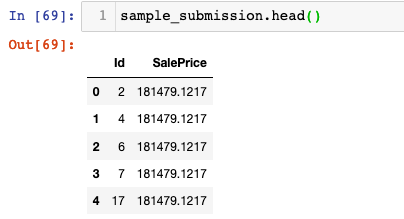